**Neural_Network_project**

#Importing the Dataset

In [196]:
from google.colab import files
files.upload()


Saving heart_disease.csv to heart_disease.csv


{'heart_disease.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#print first 5 rows of the dataset

In [199]:
df= pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [200]:
print (df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

#number of rows and columns in the dataset

In [201]:
df.shape

(303, 14)

#getting some info about the data

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# statistical measures about the data

In [203]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


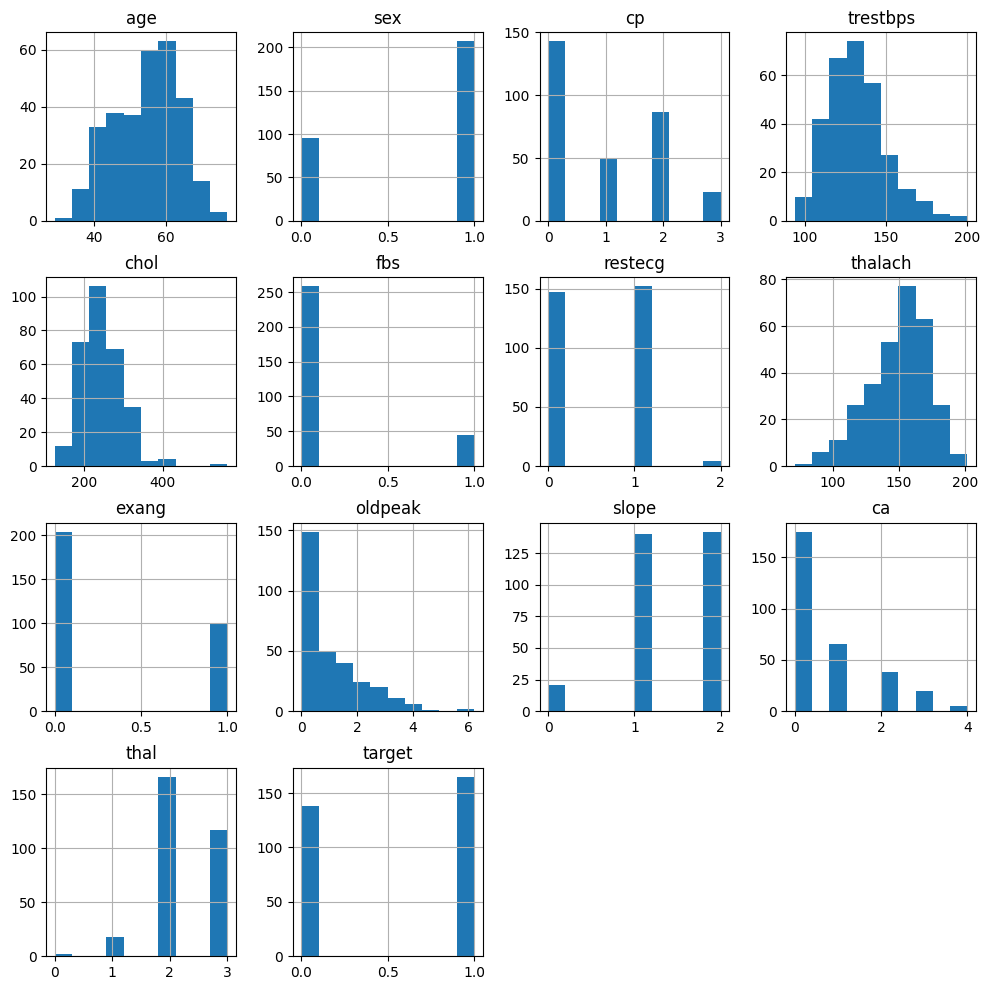

In [204]:
df.hist(figsize = (12, 12))
plt.show()

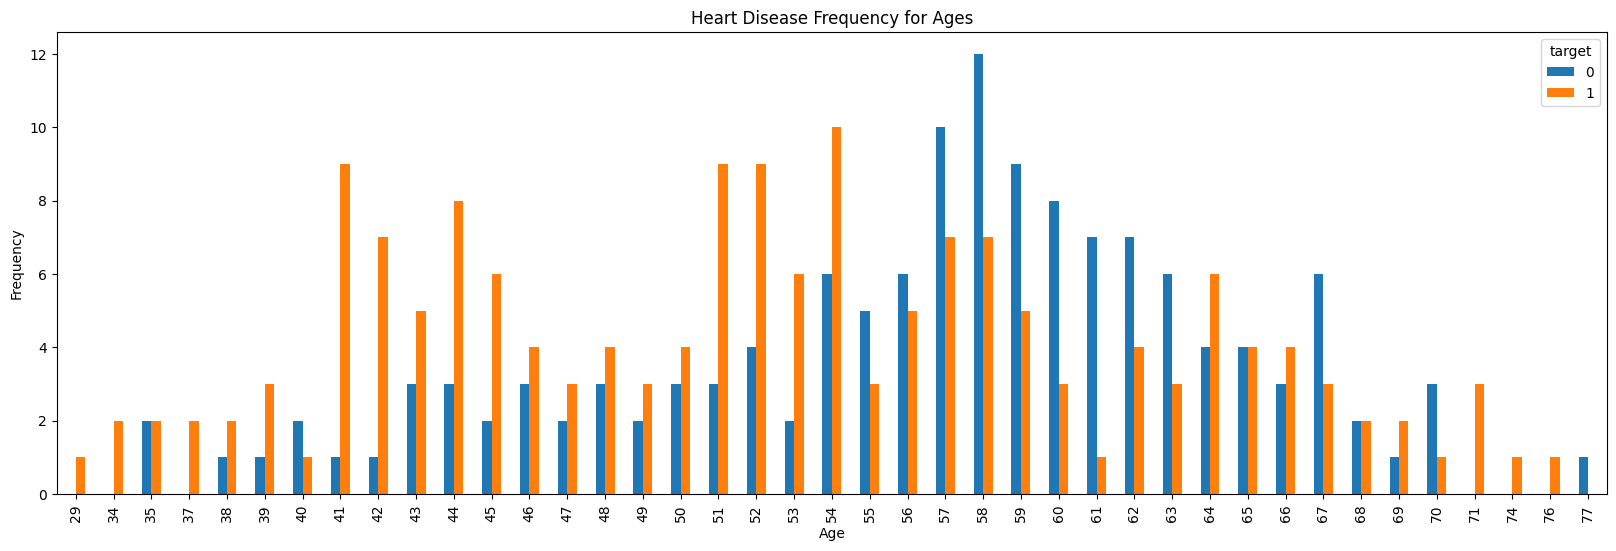

In [205]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Correlation Matrix

In [206]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


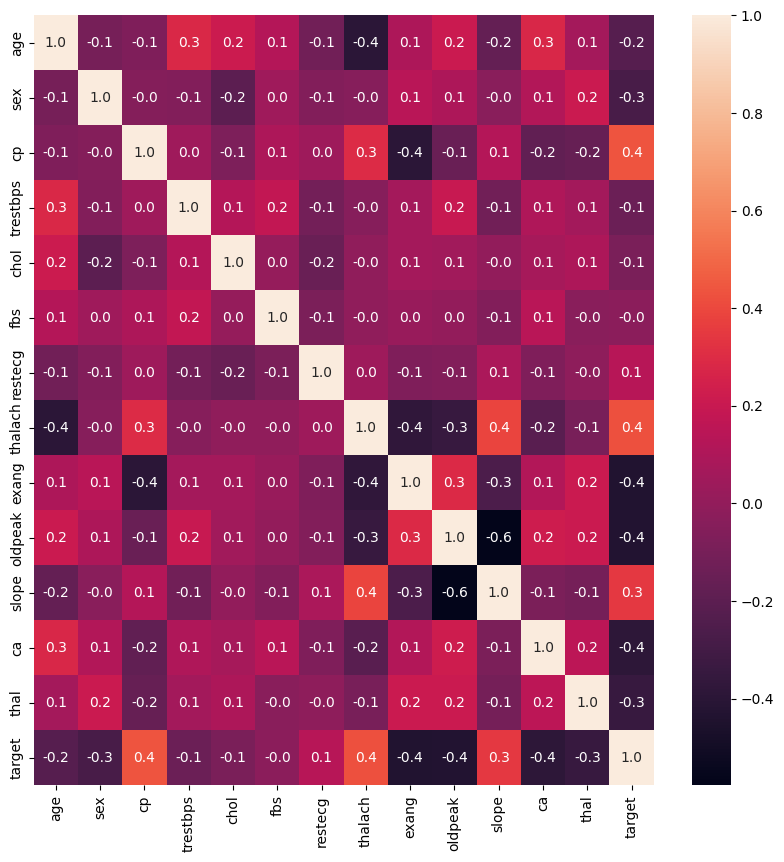

In [207]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

# checking the distribution of Target variable

In [208]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1-->Defective Heart

0-->Healthy Heart

#Spliting the Features and Target

In [209]:
X = df.drop(['target'], axis=1)

y = df['target']

In [211]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

#Splitting the Data into Training data & Test Data

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# convert the data to categorical labels

In [214]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (y_train.shape)
print (y_train[:10])

(242,)
132    1
202    0
196    0
75     1
176    0
59     1
93     1
6      1
177    0
30     1
Name: target, dtype: int64


In [156]:
X_train[0]

array([ 49. ,   1. ,   2. , 118. , 149. ,   0. ,   0. , 126. ,   0. ,
         0.8,   2. ,   3. ,   2. ])

#Building and Training the Neural Network


In [215]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                224       
                                                                 
 dropout_38 (Dropout)        (None, 16)                0         
                                                                 
 dense_58 (Dense)            (None, 8)                 136       
                                                                 
 dropout_39 (Dropout)        (None, 8)                 0         
                                                                 
 dense_59 (Dense)            (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# fit the model to the training data

In [216]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=10, batch_size=10)

Epoch 1/10
25/25 [==============================] - 1s 11ms/step - loss: 0.6865 - accuracy: 0.5455 - val_loss: 0.6774 - val_accuracy: 0.5246
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5620 - val_loss: 0.6508 - val_accuracy: 0.5574
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.6446 - val_loss: 0.6129 - val_accuracy: 0.8525
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7479 - val_loss: 0.5712 - val_accuracy: 0.8361
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5644 - accuracy: 0.7686 - val_loss: 0.5359 - val_accuracy: 0.8689
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5344 - accuracy: 0.8182 - val_loss: 0.4999 - val_accuracy: 0.8852
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.8347 - val_loss: 0.4682 - val_accuracy: 0.8852
Epoch 8/10
25/25 [=

#Model Evaluation

In [217]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [218]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
pred=model.predict(X_test)
pred


2/2 [==============================] - 0s 6ms/step


array([[0.6796872 , 0.32031277],
       [0.3546441 , 0.6453559 ],
       [0.20011374, 0.7998863 ],
       [0.753047  , 0.24695292],
       [0.15287745, 0.84712255],
       [0.14088483, 0.85911506],
       [0.3783966 , 0.6216034 ],
       [0.8030401 , 0.19695997],
       [0.80127907, 0.1987209 ],
       [0.4952528 , 0.5047473 ],
       [0.2854329 , 0.71456695],
       [0.69620264, 0.3037973 ],
       [0.14838064, 0.8516193 ],
       [0.7736063 , 0.22639368],
       [0.03796782, 0.96203214],
       [0.09614647, 0.9038536 ],
       [0.03372043, 0.96627957],
       [0.73191464, 0.2680854 ],
       [0.80456984, 0.19543017],
       [0.7885704 , 0.21142963],
       [0.375314  , 0.6246859 ],
       [0.7764763 , 0.22352372],
       [0.68256956, 0.31743038],
       [0.23882663, 0.7611733 ],
       [0.11237048, 0.8876295 ],
       [0.22871596, 0.771284  ],
       [0.1910345 , 0.80896544],
       [0.42284477, 0.5771552 ],
       [0.74117756, 0.25882247],
       [0.09184229, 0.9081577 ],
       [0.

In [220]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))


2/2 [==============================] - 0s 3ms/step
Results for Categorical Model
0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



[[25  4]
 [ 3 29]]


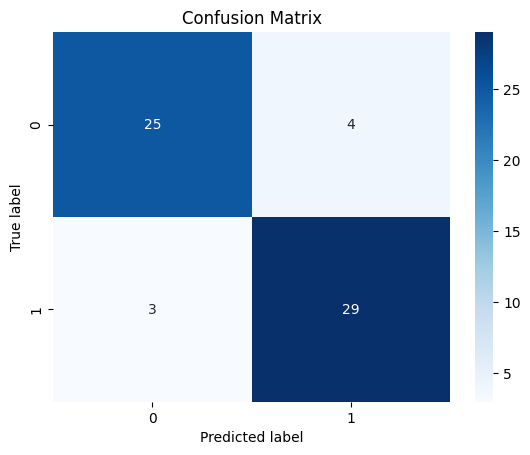

In [222]:
# Generate a confusion matrix
matrix = confusion_matrix(y_test, categorical_pred)
print(matrix)
# Visualize the confusion matrix
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

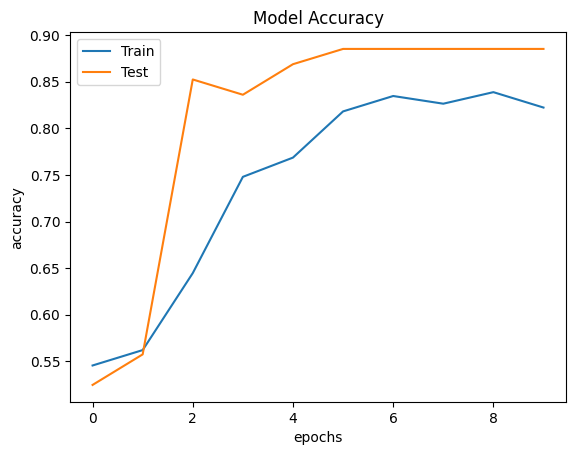

In [223]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'])
plt.show()

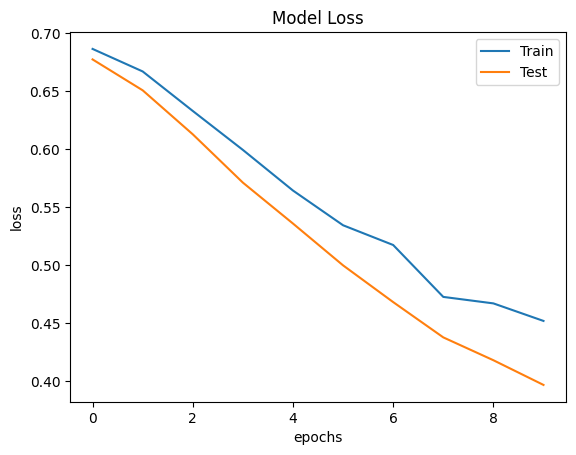

In [224]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'])
plt.show()

#Accuracy Score and Prediction

In [225]:
score, acc = model.evaluate(X_train, Y_train)
print('Test Loss =', score)
print('Test Accuracy =', acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8595
Test Loss = 0.4018818438053131
Test Accuracy = 0.8595041036605835
